In [2]:
 import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os


sns.set(style="whitegrid")


In [18]:
import pandas as pd
import os

data_folder = "C:/Users/YourName/Documents/solar_data"  # change path

# Load datasets
benin = pd.read_csv("benin-malanville.csv")
togo = pd.read_csv("togo-dapaong_qc.csv")
sierra = pd.read_csv("sierraleone-bumbuna.csv")

# Quick check
print(benin.columns)
print(togo.columns)
print(sierra.columns)


Index(['Timestamp', 'GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS',
       'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation',
       'TModA', 'TModB', 'Comments'],
      dtype='object')
Index(['Timestamp', 'GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS',
       'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation',
       'TModA', 'TModB', 'Comments'],
      dtype='object')
Index(['Timestamp', 'GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS',
       'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation',
       'TModA', 'TModB', 'Comments'],
      dtype='object')


In [22]:
def clean_cols(df):
    df.columns = df.columns.str.strip().str.lower().str.replace(' ','_')
    return df

benin = clean_cols(benin)
togo = clean_cols(togo)
sierra = clean_cols(sierra)



In [24]:
benin['country'] = 'Benin'
togo['country'] = 'Togo'
sierra['country'] = 'Sierra Leone'


In [26]:
all_data = pd.concat([benin, togo, sierra], ignore_index=True)
print(all_data.shape)
all_data.head()



(1576800, 20)


,timestamp,ghi,dni,dhi,moda,modb,tamb,rh,ws,wsgust,wsstdev,wd,wdstdev,bp,cleaning,precipitation,tmoda,tmodb,comments,country
0,2021-08-09 00:01,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN,Benin
1,2021-08-09 00:02,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN,Benin
2,2021-08-09 00:03,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN,Benin
3,2021-08-09 00:04,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN,Benin
4,2021-08-09 00:05,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN,Benin


In [28]:
print("Shape:", all_data.shape)
print("\nMissing values per column:\n", all_data.isna().sum())
print("\nSummary statistics:\n")
display(all_data.describe())



Shape: (1576800, 20)

Missing values per column:
 timestamp              0
ghi                    0
dni                    0
dhi                    0
moda                   0
modb                   0
tamb                   0
rh                     0
ws                     0
wsgust                 0
wsstdev                0
wd                     0
wdstdev                0
bp                     0
cleaning               0
precipitation          0
tmoda                  0
tmodb                  0
comments         1576800
country                0
dtype: int64

Summary statistics:



,ghi,dni,dhi,moda,modb,tamb,rh,ws,wsgust,wsstdev,wd,wdstdev,bp,cleaning,precipitation,tmoda,tmodb,comments
count,1.576800e+06,1.576800e+06,1.576800e+06,1.576800e+06,1.576800e+06,1.576800e+06,1.576800e+06,1.576800e+06,1.576800e+06,1.576800e+06,1.576800e+06,1.576800e+06,1.576800e+06,1.576800e+06,1.576800e+06,1.576800e+06,1.576800e+06,0.0
mean,2.243573e+02,1.449408e+02,1.151746e+02,2.231257e+02,2.155223e+02,2.741696e+01,6.298333e+01,1.878440e+00,2.576763e+00,4.649840e-01,1.494072e+02,8.771398e+00,9.899963e+02,8.079655e-04,2.697615e-03,3.339823e+01,3.286939e+01,NaN
std,3.181073e+02,2.453781e+02,1.580602e+02,3.154732e+02,3.049439e+02,5.131024e+00,2.854366e+01,1.536357e+00,1.961275e+00,2.904002e-01,1.039399e+02,6.790689e+00,1.046797e+01,2.841326e-02,3.803610e-02,1.290953e+01,1.238889e+01,NaN
min,-1.950000e+01,-7.800000e+00,-1.790000e+01,0.000000e+00,0.000000e+00,1.100000e+01,2.100000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.680000e+02,0.000000e+00,0.000000e+00,9.000000e+00,8.100000e+00,NaN
25%,-2.200000e+00,-2.000000e-01,-1.400000e+00,0.000000e+00,0.000000e+00,2.370000e+01,3.860000e+01,6.000000e-01,1.100000e+00,4.000000e-01,5.330000e+01,2.900000e+00,9.770000e+02,0.000000e+00,0.000000e+00,2.370000e+01,2.370000e+01,NaN
50%,1.200000e+00,0.000000e+00,1.400000e+00,4.100000e+00,4.000000e+00,2.680000e+01,6.900000e+01,1.800000e+00,2.400000e+00,5.000000e-01,1.803000e+02,9.000000e+00,9.940000e+02,0.000000e+00,0.000000e+00,2.830000e+01,2.800000e+01,NaN
75%,4.244000e+02,2.270000e+02,2.190000e+02,4.111000e+02,3.973000e+02,3.100000e+01,8.860000e+01,2.800000e+00,3.600000e+00,6.000000e-01,2.342000e+02,1.290000e+01,9.990000e+02,0.000000e+00,0.000000e+00,4.260000e+01,4.190000e+01,NaN
max,1.499000e+03,1.004500e+03,8.920000e+02,1.507000e+03,1.473000e+03,4.380000e+01,1.000000e+02,1.950000e+01,2.660000e+01,4.700000e+00,3.600000e+02,9.940000e+01,1.006000e+03,1.000000e+00,2.500000e+00,8.100000e+01,9.460000e+01,NaN


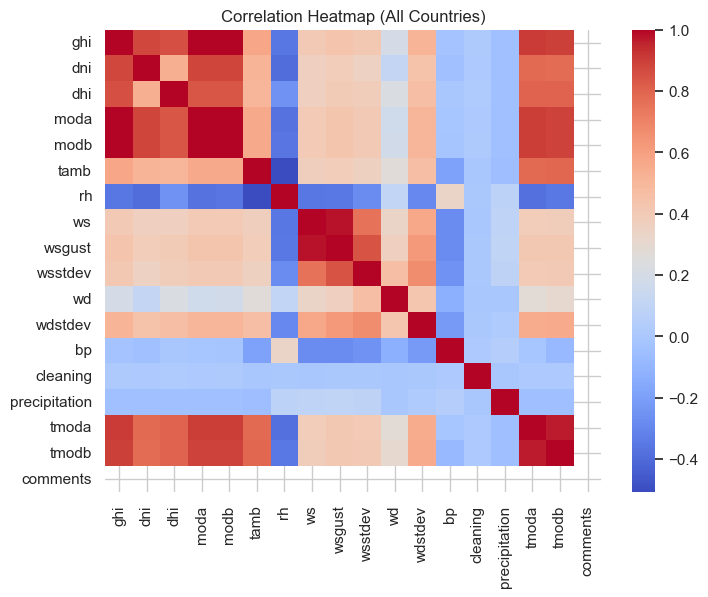

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.heatmap(all_data.corr(numeric_only=True), cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap (All Countries)")
plt.show()


In [36]:
all_data.columns


Index(['timestamp', 'ghi', 'dni', 'dhi', 'moda', 'modb', 'tamb', 'rh', 'ws',
       'wsgust', 'wsstdev', 'wd', 'wdstdev', 'bp', 'cleaning', 'precipitation',
       'tmoda', 'tmodb', 'comments', 'country'],
      dtype='object')

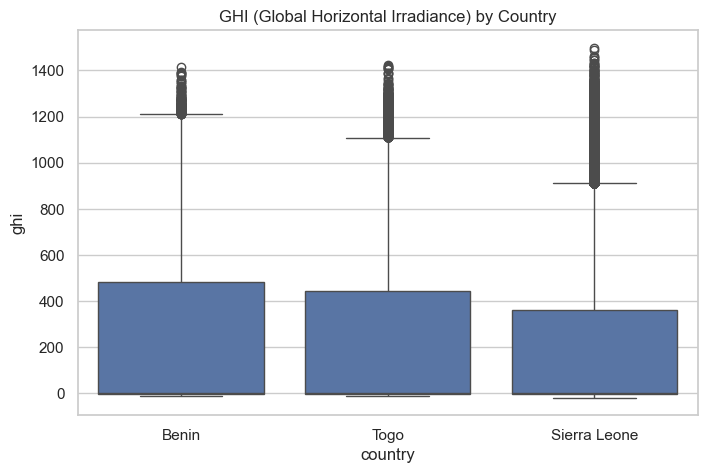

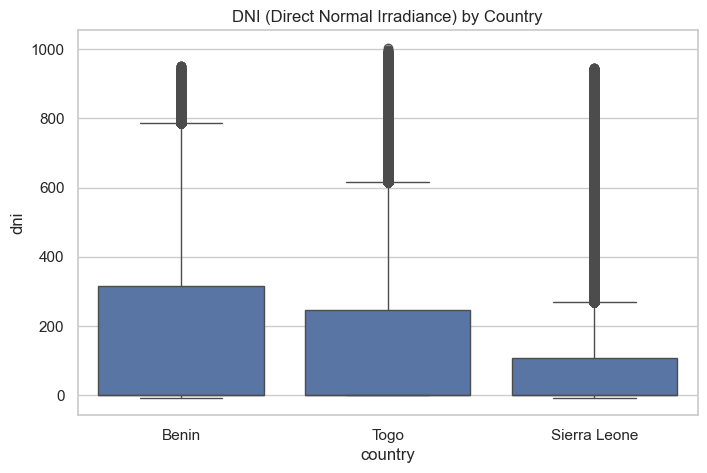

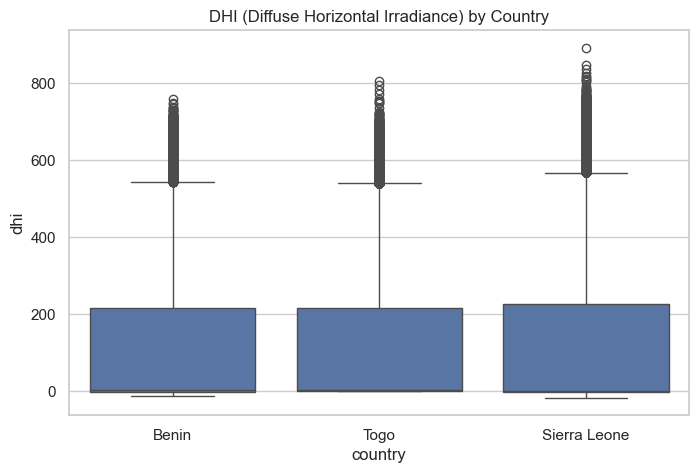

In [38]:
plt.figure(figsize=(8,5))
sns.boxplot(x='country', y='ghi', data=all_data)
plt.title("GHI (Global Horizontal Irradiance) by Country")
plt.show()

plt.figure(figsize=(8,5))
sns.boxplot(x='country', y='dni', data=all_data)
plt.title("DNI (Direct Normal Irradiance) by Country")
plt.show()

plt.figure(figsize=(8,5))
sns.boxplot(x='country', y='dhi', data=all_data)
plt.title("DHI (Diffuse Horizontal Irradiance) by Country")
plt.show()


In [40]:
summary = all_data.groupby('country')[['ghi','dni','dhi']].agg(['mean','median','std']).round(2)
print(summary)


                 ghi                    dni                    dhi         \
                mean median     std    mean median     std    mean median   
country                                                                     
Benin         240.56    1.8  331.13  167.19   -0.1  261.71  115.36    1.6   
Sierra Leone  201.96    0.3  298.50  116.38   -0.1  218.65  113.72   -0.1   
Togo          230.56    2.1  322.53  151.26    0.0  250.96  116.44    2.5   

                      
                 std  
country               
Benin         158.69  
Sierra Leone  158.95  
Togo          156.52  


C:\Users\soft\AppData\Local\Temp\ipykernel_5336\735178427.py:9: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
C:\Users\soft\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


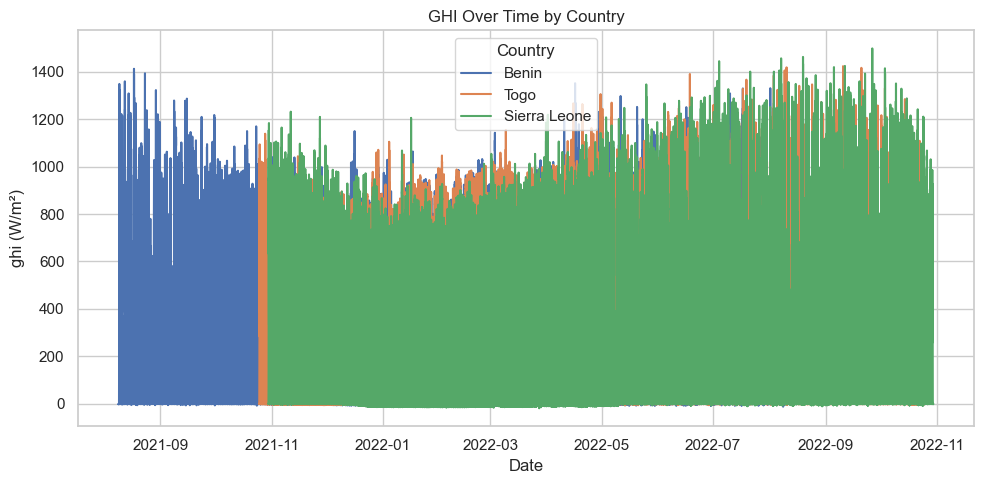

In [46]:

all_data['timestamp'] = pd.to_datetime(all_data['timestamp'], errors='coerce')

plt.figure(figsize=(10,5))
sns.lineplot(data=all_data, x='timestamp', y='ghi', hue='country')
plt.title("GHI Over Time by Country")
plt.xlabel("Date")
plt.ylabel("ghi (W/m²)")
plt.legend(title='Country')
plt.tight_layout()
plt.show()
